<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/mikyWordCloud/women_and_men_natural_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# elimino dal dataframe le righe che non sono state riconosciute e presentano questa scritta
res = res[((res.age != 'Not recognized'))]

In [2]:
def contaparole(x):

  #creazione di una variabile con valore 0
  parole=0
  
  #analizza la stringa partendo dal primo carattere, quando trova uno spazio si blocca ed inserisce la porzione di stringa in una lista (vettore).
  a = x.split(" ")

  #la lista creata potrebbe anche contenere parole composte da un valore vuoto. Tramite il ciclo for si esegue una verifica e vengono contate solo i valori che contengano almeno un carattere che non sia lo spazio.
  for i in a:
    if (i!=""):
      parole = parole + 1

  return parole

In [5]:
# lunghezza media delle recensioni delle donne in tutti i ristoranti
women = res[(res['gender'] == 'feminine')]
print(len(women))

lenCaratteriTot = -42800  #numero di "<br>" all'interno del testo
lenParoleTot = -10700  #numero di "<br>" all'interno del testo

for text in women['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_c_women_reviews = lenCaratteriTot/(len(women) - 1)
avg_p_women_reviews = lenParoleTot/(len(women) - 1)

print(avg_c_women_reviews)    # media dei caratteri scritti dagli asiatici in generale nei ristoranti asiatici
print(avg_p_women_reviews)   # media delle parole scritte dagli asiatici in generale nei ristoranti asiatici

4791
581.2137787056367
103.28288100208768


In [6]:
# lunghezza media delle recensioni delle donne in tutti i ristoranti
men = res[(res['gender'] == 'masculine')]

lenCaratteriTot = -29840  #numero di "<br>" all'interno del testo
lenParoleTot = -7460  #numero di "<br>" all'interno del testo

for text in men['text_review']:
    lenCaratteriTot = len(text) + lenCaratteriTot
    lenParoleTot = contaparole(text) + lenParoleTot

avg_c_men_reviews = lenCaratteriTot/(len(men) - 1)
avg_p_men_reviews = lenParoleTot/(len(men) - 1)

print(avg_c_men_reviews)    # media dei caratteri scritti dagli asiatici in generale nei ristoranti asiatici
print(avg_p_men_reviews)   # media delle parole scritte dagli asiatici in generale nei ristoranti asiatici

562.9328566987876
99.44358097606465


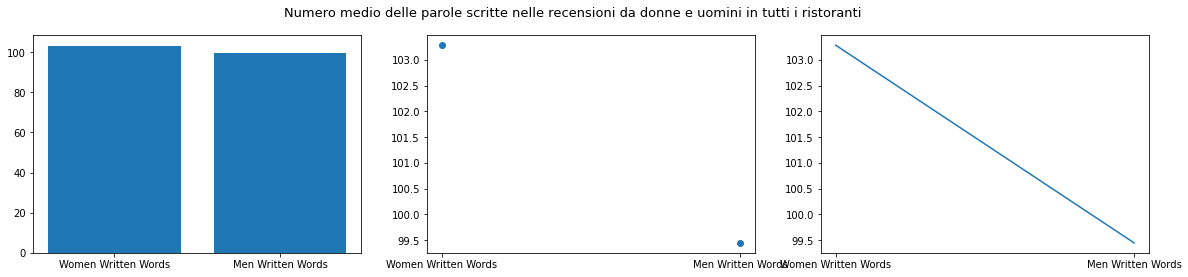

In [7]:
import matplotlib.pyplot as plt

# Asse delle x = ristoranti, Asse delle y = valori delle medie

names = ['Women Written Words', 'Men Written Words']
values = [avg_p_women_reviews, avg_p_men_reviews]

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Numero medio delle parole scritte nelle recensioni da donne e uomini in tutti i ristoranti', fontsize = 13)
plt.show()
